## Clasificación

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [27]:
import numpy as np
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


DecisionTreeClassifier(max_depth=2, random_state=42)

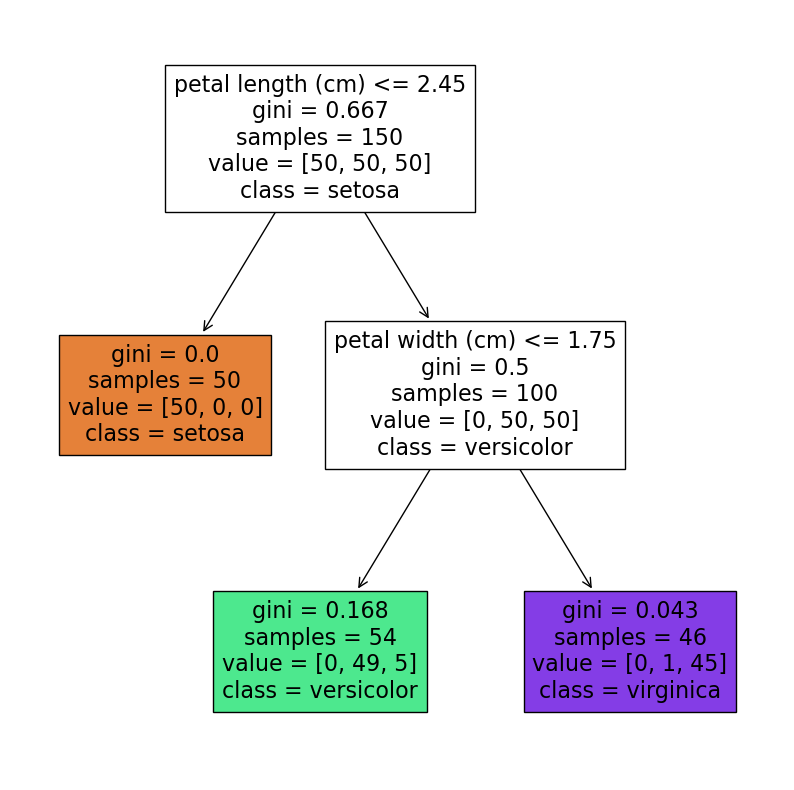

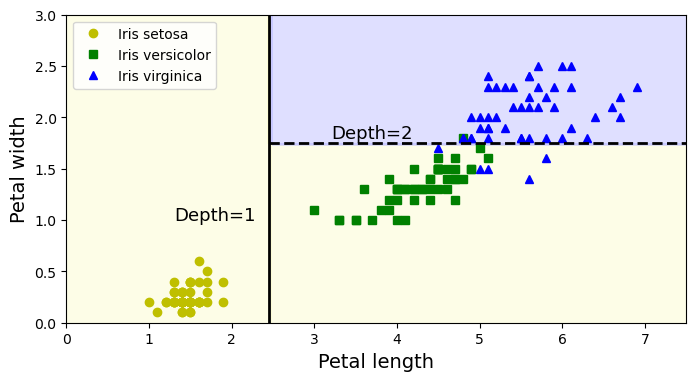

In [32]:
from matplotlib.colors import ListedColormap
import numpy as np 

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
        plt.legend()
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)

plt.text(1.30, 1.0, "Depth=1", fontsize=13)
plt.text(3.2, 1.80, "Depth=2", fontsize=13)


plt.show();

In [33]:
# Predecir clases y probabilidades
# flor: long. pétalo 5 y ancho 1.5

tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [34]:
tree_clf.predict([[5, 1.5]])

array([1])

Los árboles de decisión tienden a cometer overfitting

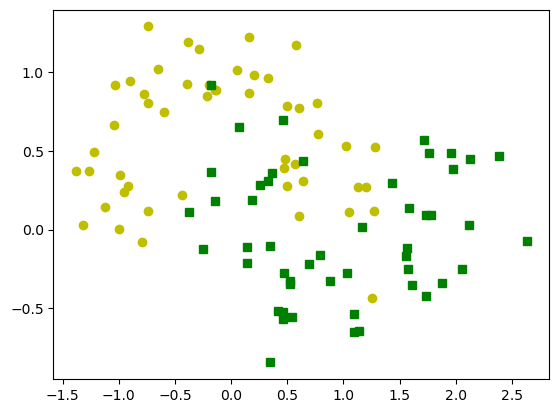

In [41]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25,
                   random_state=53)

plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "yo")
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "gs");

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

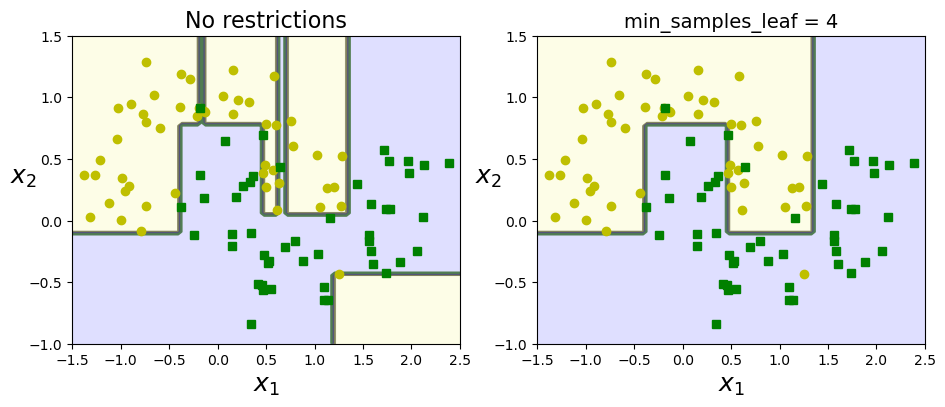

In [43]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## Regresión

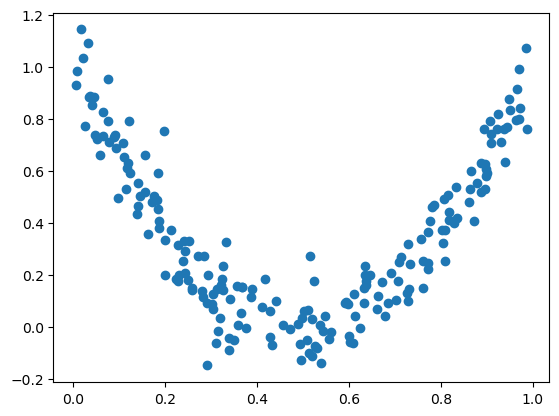

In [47]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X-0.5)**2
y = y + np.random.randn(m,1)/10

plt.plot(X,y,'o');

DecisionTreeRegressor(max_depth=2, random_state=42)

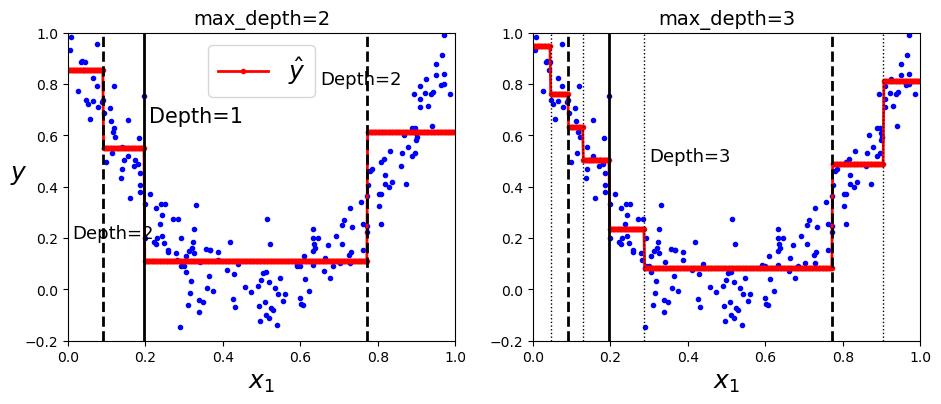

In [50]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=1", fontsize=15)
plt.text(0.01, 0.2, "Depth=2", fontsize=13)
plt.text(0.65, 0.8, "Depth=2", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=3", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

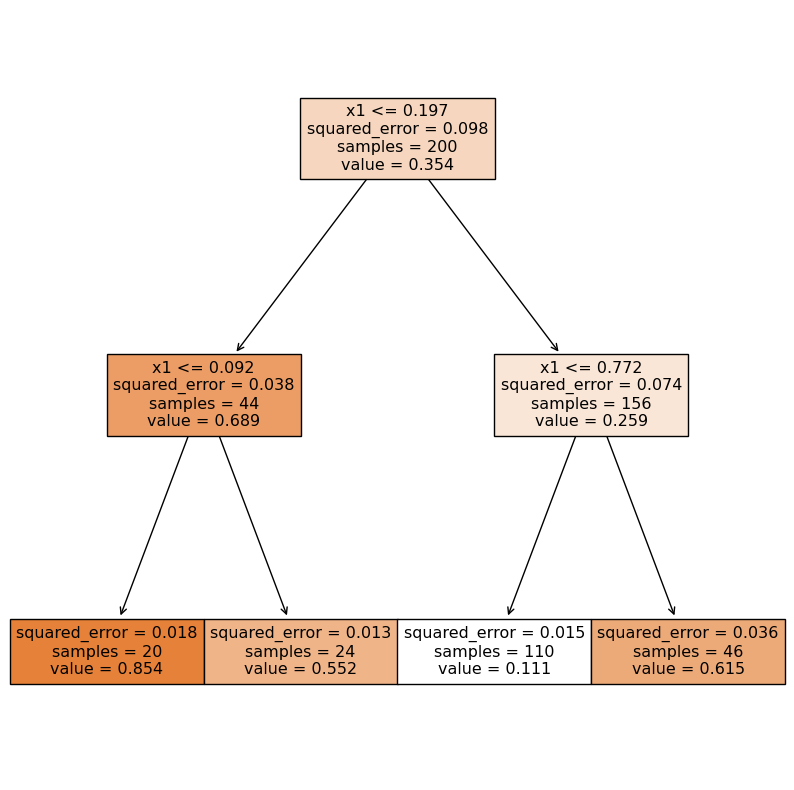

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

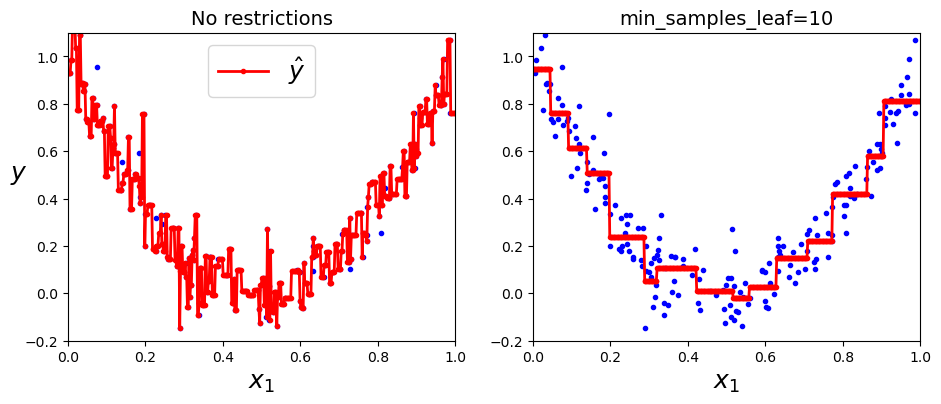

In [55]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()